# Overhead setting

In [85]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import datetime
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import numpy as np

In [86]:
# Load .env enviroment variables
load_dotenv()

True

In [87]:
# Set Alpaca API key and secret key
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [88]:
# Universal variables:
T=6
selected_stock="AMZN"
benchmark="SPY"

end = datetime.date.today()
begin=end-pd.DateOffset(365*T)
st=begin.strftime('%Y-%m-%d')
ed=end.strftime('%Y-%m-%d')


In [89]:
# Universal Functions

def n_year_ago(n):
    # to get the date of "n years ago from today"
    n_years_ago=(end-pd.DateOffset(365*n)).strftime('%Y-%m-%d')
    return n_years_ago


# Grab data from Alpaca API

In [90]:
# Format current date as ISO format
start_date = pd.Timestamp(st, tz="America/New_York").isoformat()
end_date = pd.Timestamp(ed, tz="America/New_York").isoformat()

# Set the tickers list to fetch info from Alpaca API

tickers = [selected_stock, benchmark]


# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices in tickers list
df_raw = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df


In [91]:
SPY = df_raw[df_raw['symbol']=='SPY'].drop('symbol', axis=1)
AMZN = df_raw[df_raw['symbol']=='AMZN'].drop('symbol', axis=1)

In [92]:
AMZN.tail()

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2022-04-08 04:00:00+00:00,3135.00,3147.3700,3084.615,3089.21,2293278,174418,3111.042491
2022-04-11 04:00:00+00:00,3053.00,3082.7299,3010.690,3022.44,2603289,191027,3038.854451
2022-04-12 04:00:00+00:00,3073.85,3101.9800,3007.660,3015.75,2751776,187773,3053.320643
2022-04-13 04:00:00+00:00,3000.51,3120.5000,2992.000,3110.82,2660010,156931,3072.639634
2022-04-14 04:00:00+00:00,3110.02,3117.9400,3029.435,3034.13,2572213,159578,3060.503802


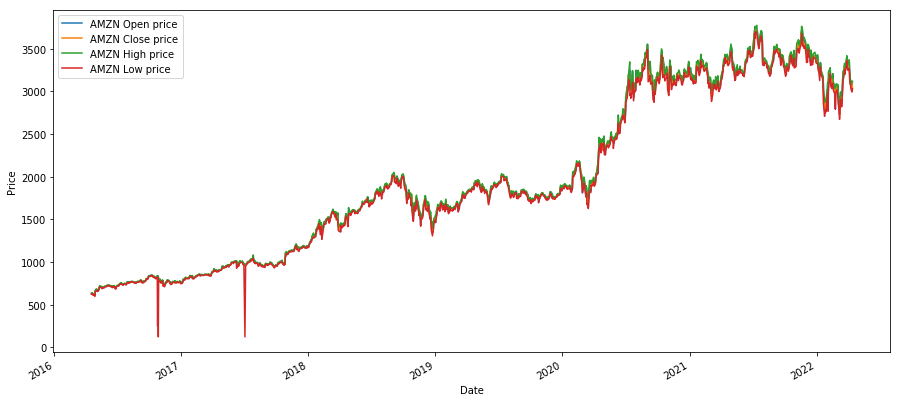

In [95]:
AMZN['open'].plot(label= 'AMZN Open price', figsize=(15,7))
AMZN['close'].plot(label= 'AMZN Close price')
AMZN['high'].plot(label= 'AMZN High price')
AMZN['low'].plot(label= 'AMZN Low price')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend()
plt.show()

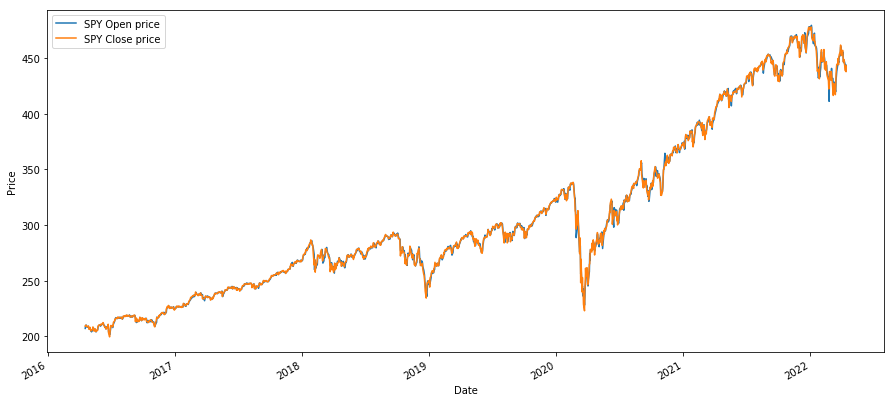

In [94]:
SPY['open'].plot(label= 'SPY Open price', figsize=(15,7))
SPY['close'].plot(label= 'SPY Close price')
# SPY['high'].plot(label= 'SPY High price')
# SPY['low'].plot(label= 'SPY Low price')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend()
plt.show()

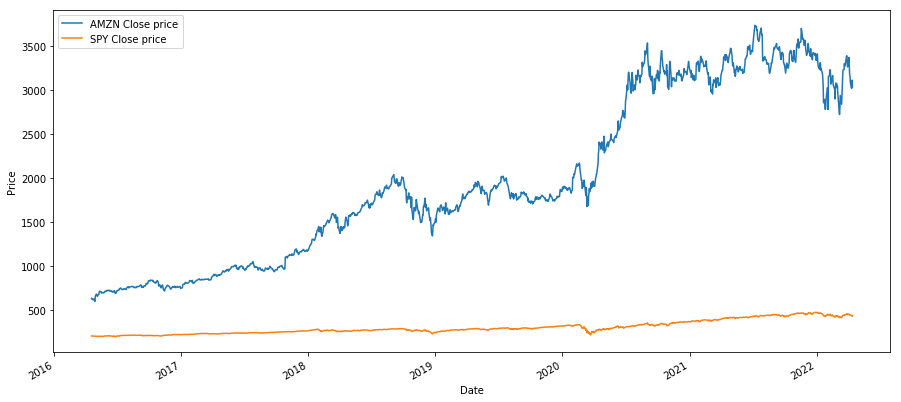

In [40]:
AMZN['close'].plot(label= 'AMZN Close price', figsize=(15,7))
SPY['close'].plot(label= 'SPY Close price')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend()
plt.show()

Text(0.5, 1.0, 'AMZN Volume Traded for the past 6 years')

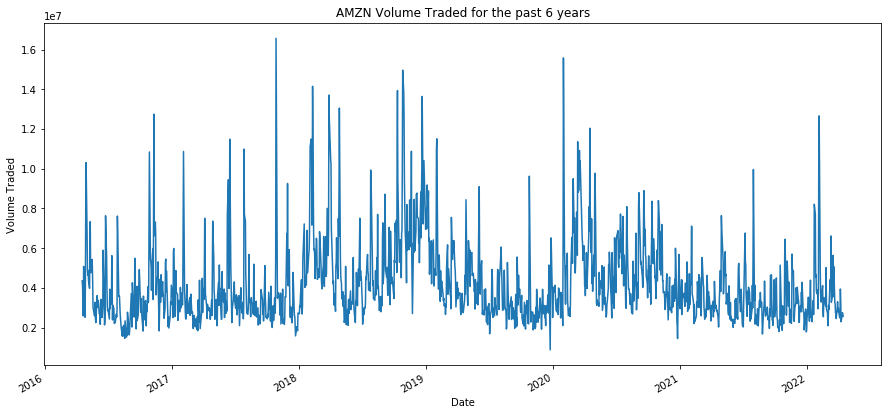

In [41]:
AMZN['volume'].plot(label='AMZN', figsize=(15,7))
plt.ylabel('Volume Traded')
plt.xlabel('Date')
plt.title('AMZN Volume Traded for the past 6 years')

Text(0.5, 1.0, 'Volume Traded for the past 6 years')

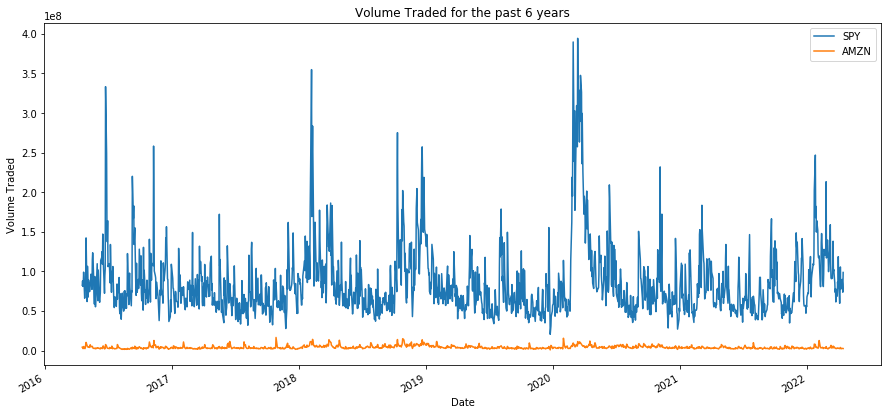

In [42]:
SPY['volume'].plot(label='SPY', figsize=(15,7))
AMZN['volume'].plot(label='AMZN')
plt.legend()
plt.ylabel('Volume Traded')
plt.xlabel('Date')
plt.title('Volume Traded for the past 6 years')

In [43]:
AMZN['total_traded'] = AMZN['open']*AMZN['volume']
SPY['total_traded'] = SPY['open']*SPY['volume']

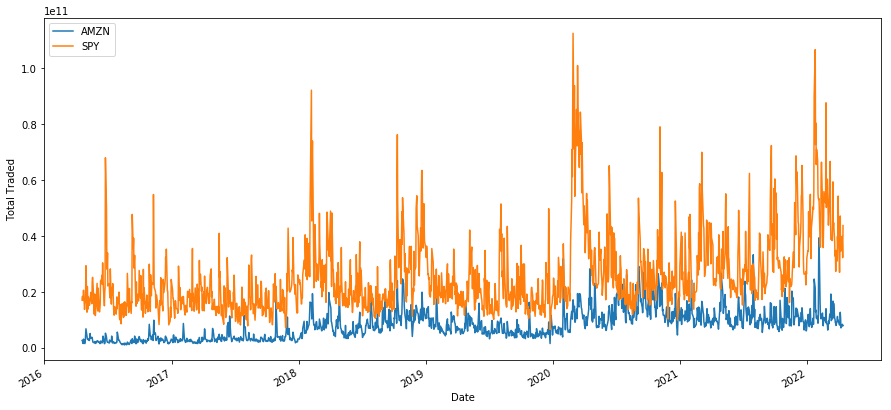

In [44]:
AMZN['total_traded'].plot(label='AMZN', figsize=(15,7))
SPY['total_traded'].plot(label='SPY')
plt.xlabel('Date')
plt.ylabel('Total Traded')
plt.legend()

In [45]:
AMZN.iloc[[AMZN.total_traded.argmax()]]

,open,high,low,close,volume,trade_count,vwap,total_traded
timestamp,,,,,,,,
2022-02-04 05:00:00+00:00,3112.13,3224.0,3012.16,3152.79,12660693,594390,3136.082793,3.940172e+10


In [46]:
AMZN.iloc[[AMZN.total_traded.argmin()]]

,open,high,low,close,volume,trade_count,vwap,total_traded
timestamp,,,,,,,,
2016-08-18 04:00:00+00:00,764.0,765.17,760.6,764.46,1458834,20719,763.552297,1.114549e+09


In [47]:
SPY.iloc[[SPY.total_traded.argmax()]]

,open,high,low,close,volume,trade_count,vwap,total_traded
timestamp,,,,,,,,
2020-02-28 05:00:00+00:00,288.62,297.892,285.54,296.26,389756653,2687374,292.306901,1.124916e+11


In [48]:
SPY.iloc[[SPY.total_traded.argmin()]]

,open,high,low,close,volume,trade_count,vwap,total_traded
timestamp,,,,,,,,
2019-12-24 05:00:00+00:00,321.43,321.52,320.9,321.23,20538059,91922,321.181643,6.601548e+09


# Create function to generate metrics

* 1-year/5-year rolling return 
* annualized rolling volatility 
* annualized rolling sharpe ratio 
* 1-year/5-year cumulative return 


In [96]:
def risk_return_metrics(df,ticker,years_list):

    df_ticker=df[['close','symbol']].loc[df['symbol']==ticker].drop(columns='symbol')
    df_ticker['daily_return']=df_ticker['close'].pct_change()
    
    
    # calculate n-year rolling return and cum return
    for years in years_list:
        
        # calculate n-year rolling total return
        df_ticker[f'{years}yr_return']=df_ticker['close'].pct_change(periods=252*years)
        # calculate n-year rolling annualized return if n>1
        if years>1:
            df_ticker[f'{years}yr_return_annualzd']=(1+df_ticker[f'{years}yr_return'])**(1/years)-1
        # calculate n-year cum return
        df_ticker[f'{years}yr_cum_return'] = (1 + df_ticker['daily_return'])[n_year_ago(years):].cumprod() - 1  
    
    
    # calculate annualized rolling standard deviation:
    df_ticker['annualizd_volatility']=df_ticker['daily_return'].rolling(252).std()*(252**0.5)
    # calculate annualized rolling sharpe ratio:
    df_ticker['annualizd_sharpe']=(252**0.5)*(df_ticker['daily_return'].rolling(252).mean()/df_ticker['annualizd_volatility'])
    
    return df_ticker
    


# Output final datasets

In [97]:
years_list=[1,5]
s_df=risk_return_metrics(df_raw,selected_stock,years_list)
b_df=risk_return_metrics(df_raw,benchmark,years_list)
s_df.to_csv("Data/selected_stock.csv")
b_df.to_csv("Data/benchmark.csv")

In [98]:
s_df.describe()

,close,daily_return,1yr_return,1yr_cum_return,5yr_return,5yr_return_annualzd,5yr_cum_return,annualizd_volatility,annualizd_sharpe
count,1511.000000,1510.000000,1259.000000,253.000000,251.000000,251.000000,1260.000000,1259.000000,1259.000000
mean,1975.527409,0.001212,0.370571,-0.018080,3.311138,0.337853,1.503153,0.290325,0.075525
std,945.383078,0.018817,0.303531,0.059473,0.517809,0.032633,0.963949,0.060753,0.050315
min,602.000000,-0.079221,-0.166343,-0.194854,2.215397,0.263127,0.015667,0.182194,-0.035816
25%,1015.690000,-0.007526,0.111157,-0.045794,2.911153,0.313593,0.831711,0.240656,0.032382
50%,1791.440000,0.001343,0.315669,-0.013109,3.407765,0.345376,1.136181,0.294327,0.074986
75%,3088.140000,0.010465,0.642790,0.020573,3.619045,0.358033,2.573386,0.347666,0.116161
max,3731.410000,0.135359,1.116988,0.104415,4.759834,0.419325,3.217855,0.389895,0.183371


In [157]:
def moving_average(data, ma, label):
#     first = data.plot(xlabel = 'Date', ylabel='Price', figsize=(15,7), label=label)
    moving_avg = data.rolling(ma).mean().plot(title='Moving Average Plot',label=f'{label} MA{ma}', xlabel = 'Date', ylabel='Price', figsize=(15,7))
#     larger_ma = data.rolling(ma*4).mean().plot(label=f'{label} MA{ma*4}')
    return moving_avg, plt.legend()

In [158]:
def line_plot(data, label, title):
    return data.plot(xlabel = 'Date', ylabel='Price', figsize=(15,7), label=label)

(<matplotlib.axes._subplots.AxesSubplot at 0x7ff43b099a50>,
 <matplotlib.legend.Legend at 0x7ff48891fd50>)

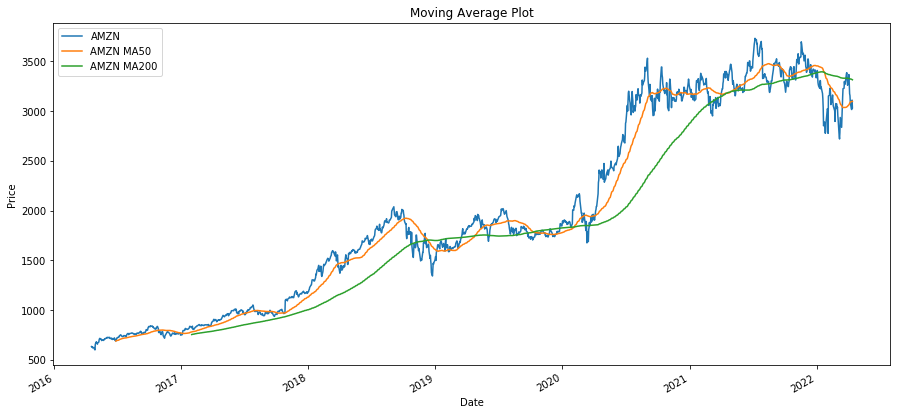

In [160]:
# Moving Average Plots
# s_df.close.plot(label='AMZN Close',figsize=(15,7))
line_plot(s_df.close, 'AMZN')
moving_average(s_df.close,50,'AMZN')
moving_average(s_df.close,200,'AMZN')

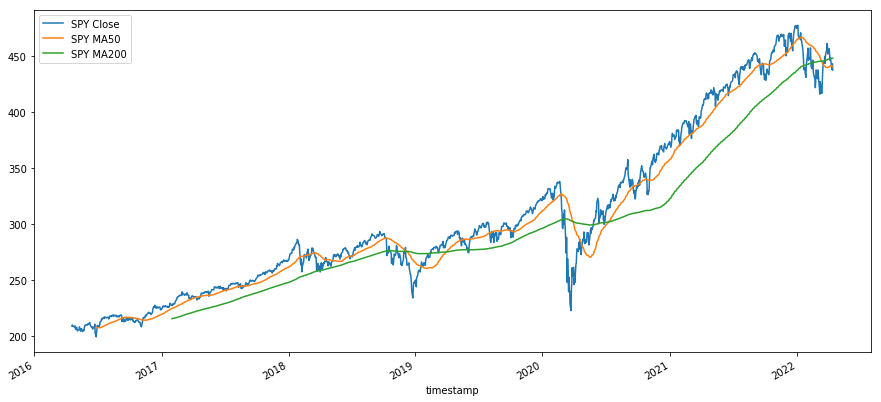

In [100]:
# Moving Average Plots
b_df.close.plot(label='SPY Close',figsize=(15,7))
b_df.close.rolling(50).mean().plot(label='SPY MA50')
b_df.close.rolling(200).mean().plot(label='SPY MA200')
plt.legend()

# Correlation

Correlation is a statistic that measures the degree to which two variables move in relation to each other. Correlation measures association, but doesn’t show if x causes y or vice versa.

The correlation between two stocks is a number form -1 to 1 (both inclusive).

 - A positive correlation means, when stock x goes up, we expect stock y to go up, and opposite.
 - A negative correlation means, when stock x goes up, we expect stock y to go down, and opposite.
 - A zero correlation, we cannot say anything in relation to each other.
 
The formula for calculating the correlation is quite a mouthful.

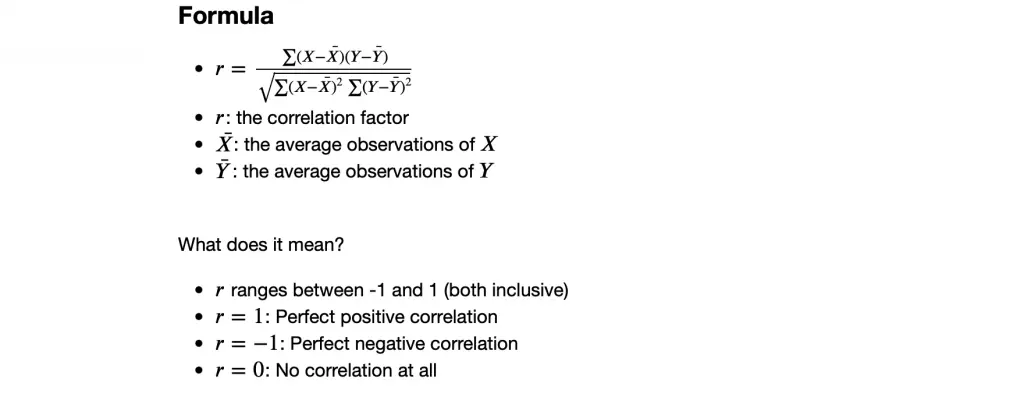

In [106]:
corr_s_with_b = pd.concat([s_df.close, s_df['5yr_return_annualzd']	, b_df.close, b_df['5yr_return_annualzd']], axis=1)
corr_s_with_b.columns = ['AMZN_close', 'AMZN_returns', 'SPY_close', 'SPY_returns']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff4aacae390>,
      dtype=object)

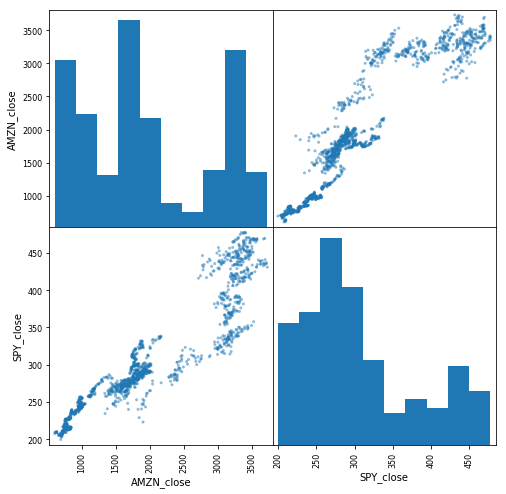

In [103]:
scatter_matrix(corr_s_with_b[['AMZN_close', 'SPY_close']], figsize=(8,8))

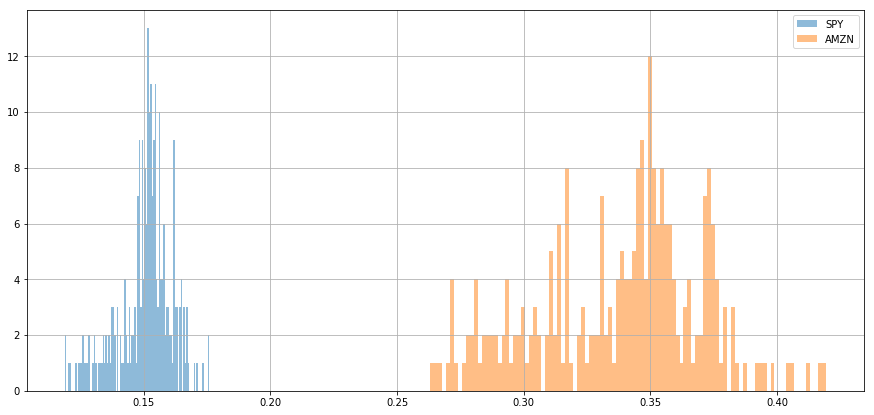

In [107]:
b_df['5yr_return_annualzd'].hist(bins=100, label='SPY', alpha=0.5, figsize=(15,7))
s_df['5yr_return_annualzd'].hist(bins=100, label='AMZN', alpha=0.5)
plt.legend()

In [162]:
def histogram(data, label):
    return data.hist(bins=100, label=label, alpha=0.5, figsize=(15,7)), plt.legend()

In [165]:
def kde_plot(data, label):
    return data.plot(kind='kde', label=label, figsize=(15,7)), plt.legend()

(<matplotlib.axes._subplots.AxesSubplot at 0x7ff448045b10>,
 <matplotlib.legend.Legend at 0x7ff4ac93c710>)

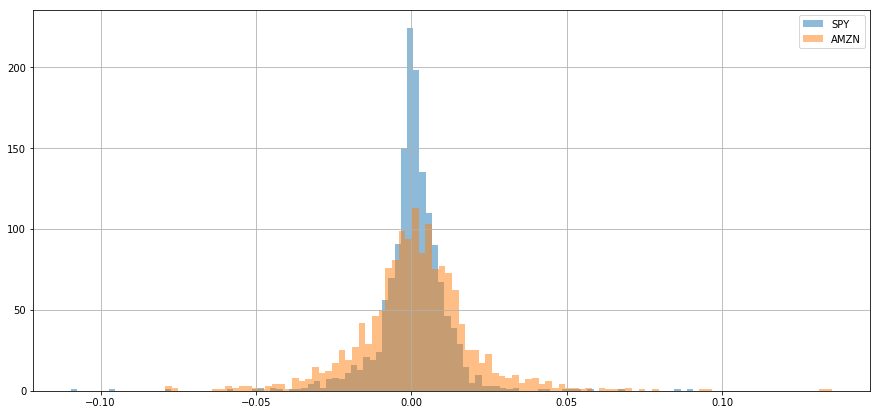

In [167]:
histogram(b_df.daily_return, 'SPY')
histogram(s_df.daily_return, 'AMZN')

(<matplotlib.axes._subplots.AxesSubplot at 0x7ff479820d50>,
 <matplotlib.legend.Legend at 0x7ff479838650>)

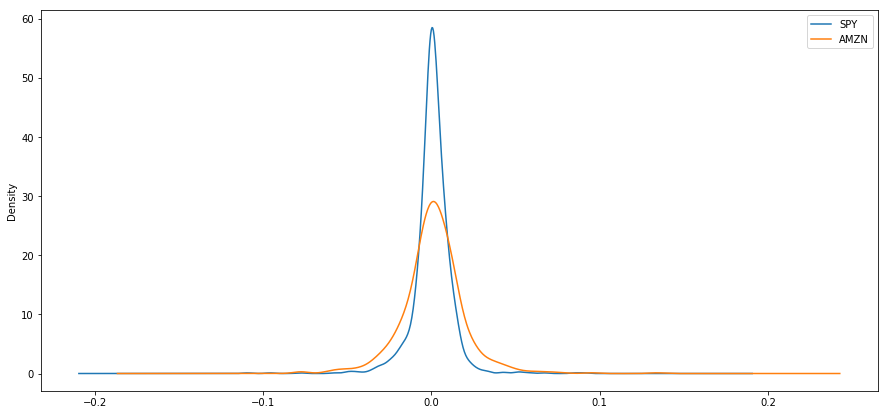

In [168]:
kde_plot(b_df.daily_return, 'SPY')
kde_plot(s_df.daily_return, 'AMZN')

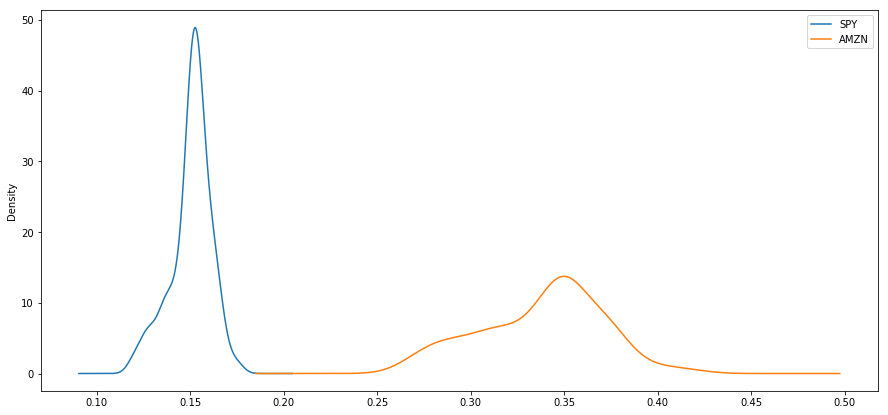

In [108]:
b_df['5yr_return_annualzd'].plot(kind='kde', label='SPY', figsize=(15,7))
s_df['5yr_return_annualzd'].plot(kind='kde', label='AMZN')
plt.legend()
plt.show()

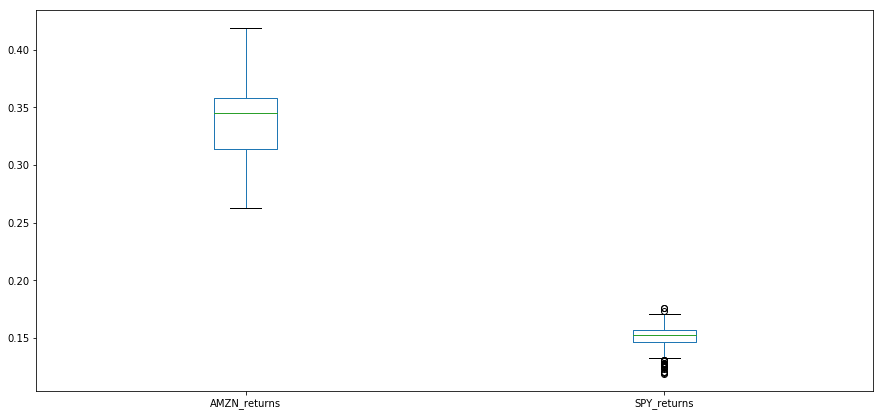

In [109]:
corr_s_with_b[['AMZN_returns', 'SPY_returns']].plot(kind='box', figsize=(15,7))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff478dc8e90>,
      dtype=object)

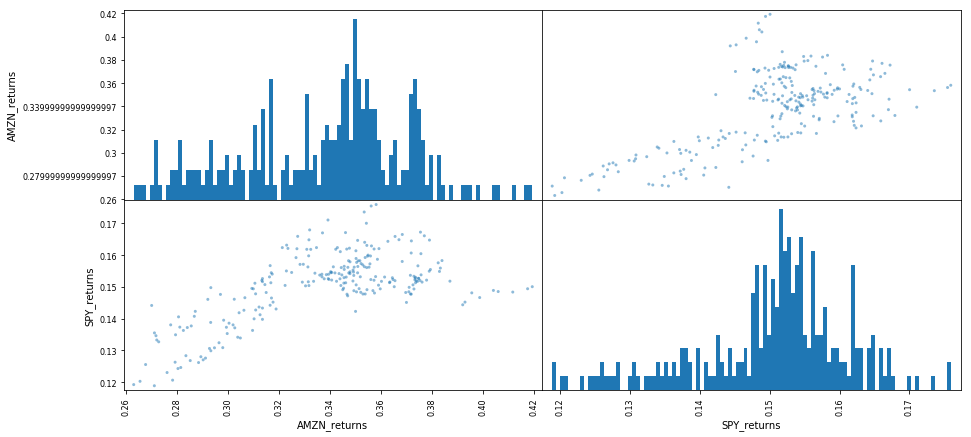

In [110]:
scatter_matrix(corr_s_with_b[['AMZN_returns', 'SPY_returns']], figsize=(15,7), hist_kwds={'bins':100})

In [81]:
corr_close_data = corr_s_with_b[['AMZN_close', 'SPY_close']]

In [82]:
log_returns = np.log(corr_close_data/corr_close_data.shift())
log_returns.corr()

,AMZN_close,SPY_close
AMZN_close,1.000000,0.609343
SPY_close,0.609343,1.000000


In [111]:
def correlation(data):
    correlation = np.log(data/data.shift())
    return correlation.corr()